In [1]:
#load the dataset
import pandas as pd
airbnb_df = pd.read_csv("C:/DocsSahi/Portfolio_Projects/airbnb_price_dataset/airbnb_combined.csv")
print(airbnb_df.head())

   Unnamed: 0     realSum     room_type  room_shared  room_private  \
0           0  194.033698  Private room        False          True   
1           1  344.245776  Private room        False          True   
2           2  264.101422  Private room        False          True   
3           3  433.529398  Private room        False          True   
4           4  485.552926  Private room        False          True   

   person_capacity  host_is_superhost  multi  biz  cleanliness_rating  ...  \
0                2              False      1    0                  10  ...   
1                4              False      0    0                   8  ...   
2                2              False      0    1                   9  ...   
3                4              False      0    1                   9  ...   
4                2               True      0    0                  10  ...   

       dist  metro_dist  attr_index  attr_index_norm  rest_index  \
0  5.022964    2.539380   78.690379       

In [2]:
print(airbnb_df.describe())

         Unnamed: 0       realSum  person_capacity         multi  \
count  51707.000000  51707.000000     51707.000000  51707.000000   
mean    1620.502388    279.879591         3.161661      0.291353   
std     1217.380366    327.948386         1.298545      0.454390   
min        0.000000     34.779339         2.000000      0.000000   
25%      646.000000    148.752174         2.000000      0.000000   
50%     1334.000000    211.343089         3.000000      0.000000   
75%     2382.000000    319.694286         4.000000      1.000000   
max     5378.000000  18545.450280         6.000000      1.000000   

                biz  cleanliness_rating  guest_satisfaction_overall  \
count  51707.000000        51707.000000                51707.000000   
mean       0.350204            9.390624                   92.628232   
std        0.477038            0.954868                    8.945531   
min        0.000000            2.000000                   20.000000   
25%        0.000000            9

In [3]:
#checking for datatypes
airbnb_df.dtypes


Unnamed: 0                      int64
realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity                 int64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating              int64
guest_satisfaction_overall      int64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
city                           object
day_type                       object
dtype: object

In [4]:
#drop column "unnamed"
airbnb_df = airbnb_df.drop(columns=["Unnamed: 0"])
airbnb_df.dtypes

realSum                       float64
room_type                      object
room_shared                      bool
room_private                     bool
person_capacity                 int64
host_is_superhost                bool
multi                           int64
biz                             int64
cleanliness_rating              int64
guest_satisfaction_overall      int64
bedrooms                        int64
dist                          float64
metro_dist                    float64
attr_index                    float64
attr_index_norm               float64
rest_index                    float64
rest_index_norm               float64
lng                           float64
lat                           float64
city                           object
day_type                       object
dtype: object

In [5]:
#check if the entire dataset contains missing values
missing_values = airbnb_df.isnull().values.any()
print(f"Dataset contains missing values: {missing_values}")

Dataset contains missing values: False


In [6]:
#check rows with missing values
rows_with_missing = airbnb_df[airbnb_df.isnull().any(axis=1)]
print(rows_with_missing)

Empty DataFrame
Columns: [realSum, room_type, room_shared, room_private, person_capacity, host_is_superhost, multi, biz, cleanliness_rating, guest_satisfaction_overall, bedrooms, dist, metro_dist, attr_index, attr_index_norm, rest_index, rest_index_norm, lng, lat, city, day_type]
Index: []

[0 rows x 21 columns]


In [7]:
#save cleaned data
airbnb_df.to_csv("C:/DocsSahi/Portfolio_Projects/airbnb_price_dataset/airbnb_cleaned.csv", index=False)
print("Saved")

Saved


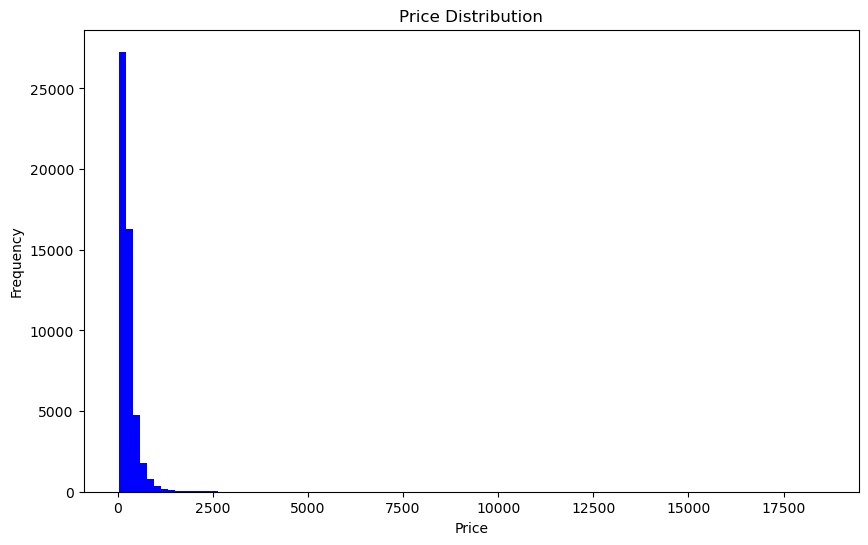

In [14]:
#descriptive analysis
#Analysing pricing distributions
import matplotlib.pyplot as plt
import seaborn as sns
airbnb_df['realSum'].plot(kind='hist', bins=100, figsize=(10, 6), color='blue')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

room_type
Entire home/apt    32648
Private room       18693
Shared room          366
Name: count, dtype: int64


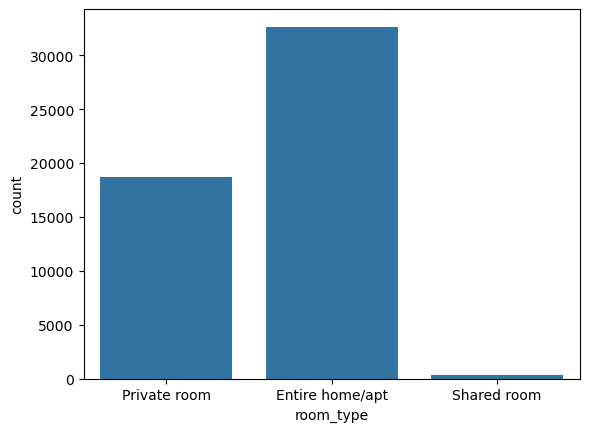

In [48]:
print(airbnb_df['room_type'].value_counts())
sns.countplot(x='room_type', data=airbnb_df);

In [20]:
print(airbnb_df.groupby('room_type')['realSum'].mean())
print(airbnb_df.groupby('city')['realSum'].mean())

room_type
Entire home/apt    324.315150
Private room       204.940233
Shared room        143.566164
Name: realSum, dtype: float64
city
amsterdam    573.112795
athens       151.744121
barcelona    293.753706
berlin       244.583752
budapest     176.513548
lisbon       238.210479
london       362.469256
paris        392.531403
rome         205.391950
vienna       241.582484
Name: realSum, dtype: float64


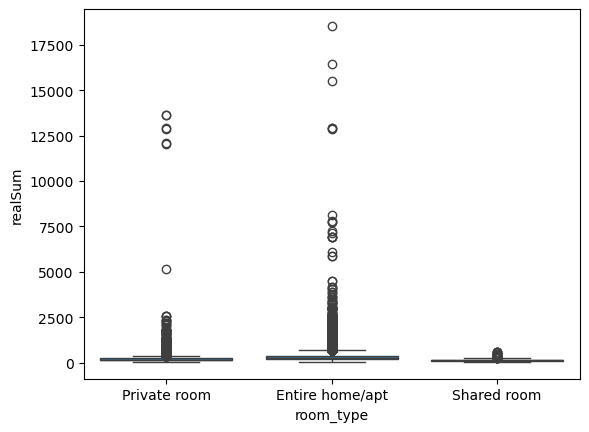

In [46]:
#Exploratory analysis
#Room type and price
sns.boxplot(x='room_type', y='realSum', data=airbnb_df);

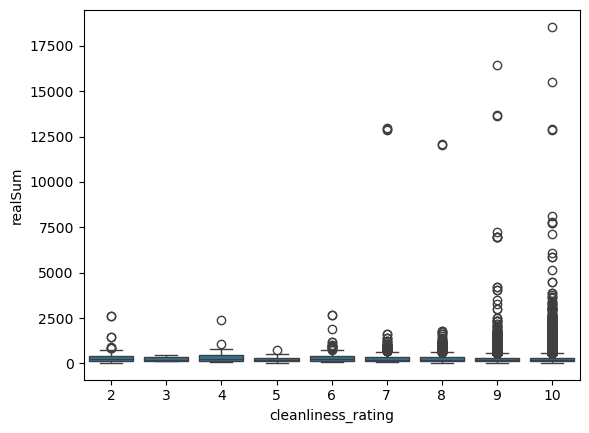

In [44]:
#cleanliness and price
sns.boxplot(x='cleanliness_rating', y='realSum', data=airbnb_df);

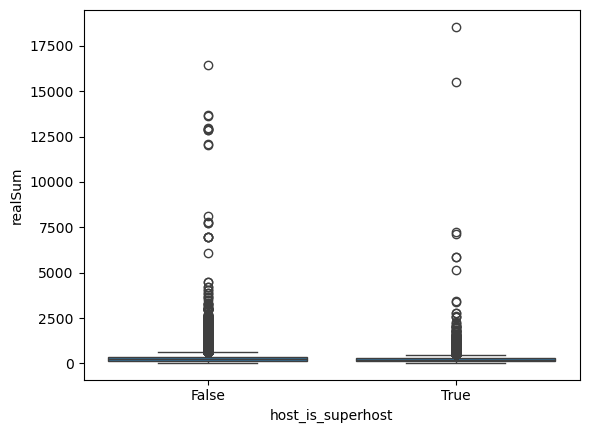

In [42]:
#Host status(suoerhost) and price
sns.boxplot(x='host_is_superhost', y='realSum', data=airbnb_df);

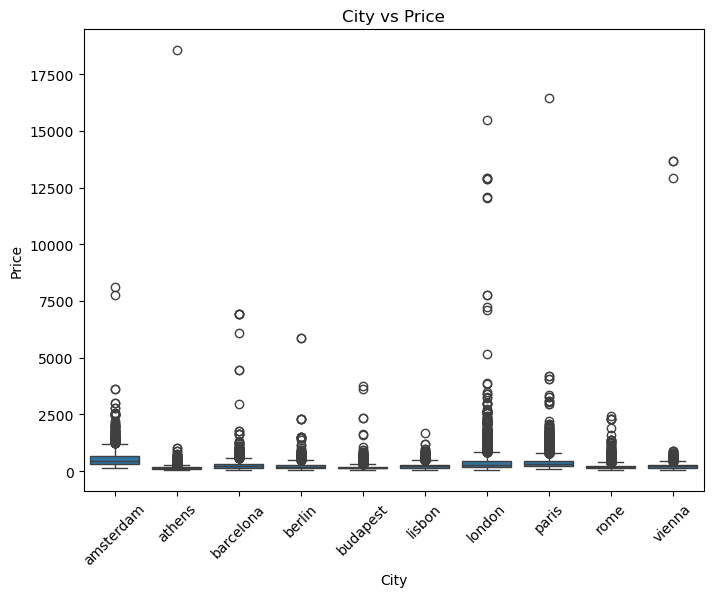

In [40]:
#city wise price analysis
plt.figure(figsize=(8, 6))
sns.boxplot(x='city', y='realSum', data=airbnb_df)
plt.title('City vs Price')
plt.xlabel('City')
plt.ylabel('Price')
plt.xticks(rotation=45);

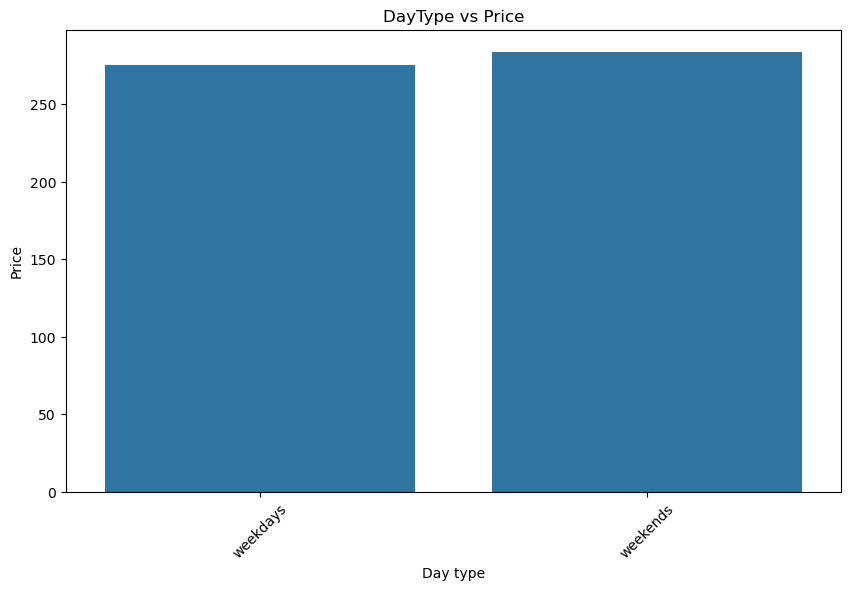

In [50]:
#week days vs weekends
plt.figure(figsize=(10, 6))
sns.barplot(x='day_type', y='realSum', data=airbnb_df, errorbar=None)
plt.title('DayType vs Price')
plt.xlabel('Day type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

In [62]:
#Geographical Analysis
!pip install folium
import folium



In [66]:
m = folium.Map(location=[airbnb_df['lat'].mean(), airbnb_df['lng'].mean()], zoom_start=6)
for _, row in airbnb_df.iterrows():
    folium.CircleMarker(
        location=(row['lat'], row['lng']),
        radius=5,
        color='blue',
        fill=True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(m)
m.save('C:/DocsSahi/Portfolio_Projects/airbnb_price_dataset/airbnb_map.html')
print("saved")

saved


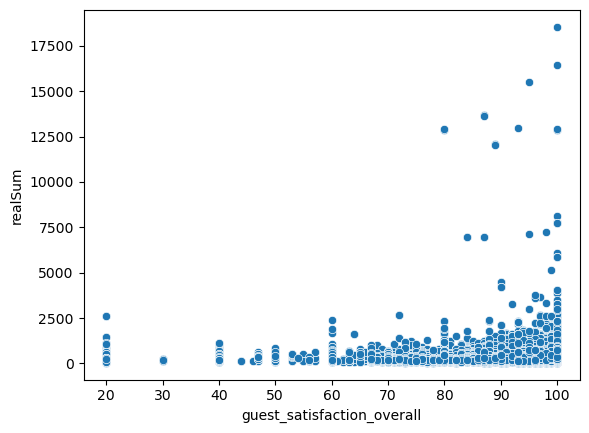

In [68]:
#Analyze guest ratings and price
sns.scatterplot(x='guest_satisfaction_overall', y='realSum', data=airbnb_df);